In [35]:
import os
import re
import numpy as np
import MDAnalysis as mda
# import matplotlib.pyplot as plt
import pandas as pd
import analyse
import hbond
import importlib

In [36]:
importlib.reload(hbond)

<module 'hbond' from '/net/grouphome/ag-bondar/Eva_Bert/code/hbond.py'>

In [7]:
PDB_CODE = '6b73'
SEQ = 'B'
folder = '../'+PDB_CODE+SEQ+'/'
results_folder = folder+'results/'
plot_folder = results_folder+'plots/'

In [8]:
pbc_file_count = len(sorted([results_folder+'namd/'+i for i in os.listdir(results_folder+'namd/') if re.match(r'(step7.).*\_production.dcd-pbc.dcd$', i)]))
pbc_files = [results_folder+'namd/step7.'+str(i)+'_production.dcd-pbc.dcd' for i in range(1,pbc_file_count+1)]
print(pbc_files)

['../6b73B/results/namd/step7.1_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.2_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.3_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.4_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.5_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.6_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.7_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.8_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.9_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.10_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.11_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.12_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.13_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.14_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.15_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.16_production.dcd-pbc.dcd', '../6b73B/results/namd/step7.17_production.dcd-pbc.dcd']


In [9]:
u =  mda.Universe(results_folder+'step5_assembly.xplor_ext.psf', pbc_files)
ref = mda.Universe(results_folder+'step5_assembly.namd.pdb')

/home/bertalae93/miniconda3/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:272: UserWarning: Serial numbers went over 100,000.  Higher serials have been guessed
  warnings.warn("Serial numbers went over 100,000.  "
/home/bertalae93/miniconda3/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:349: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, bonds will not"
/home/bertalae93/miniconda3/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:187: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, "


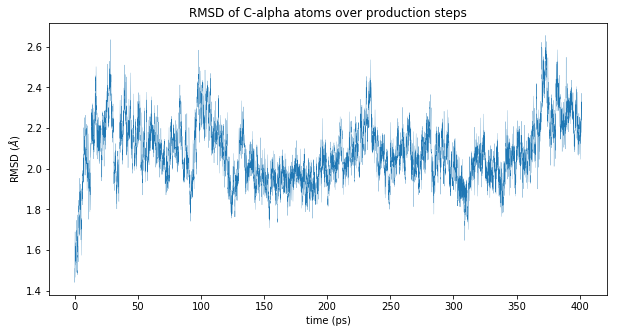

In [10]:
title = 'RMSD of C-alpha atoms over production steps'
R, r_fig = analyse.rmsd_traj(u, ref, title)

In [11]:
h_bond = hbond.HBond()

In [12]:
h_bond.prot_prot(u)

In [13]:
h_bond.print_table()

               time  donor_index  acceptor_index donor_resnm  donor_resid  \
0          0.000000           87              55         ILE            7   
1          0.000000          106              55         ILE            8   
2          0.000000          125              69         THR            9   
3          0.000000          131              69         THR            9   
4          0.000000          139              85         ALA           10   
5          0.000000          149             104         VAL           11   
6          0.000000          165             123         TYR           12   
7          0.000000          178             964         TYR           12   
8          0.000000          186             137         SER           13   
9          0.000000          193             137         SER           13   
10         0.000000          197             147         VAL           14   
11         0.000000          197             163         VAL           14   

In [14]:
h_bond.save_table(plot_folder)

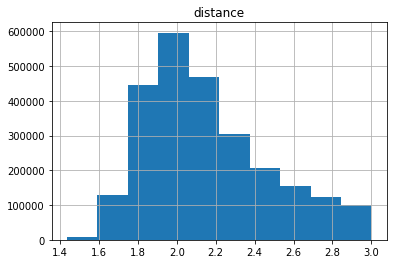

In [15]:
h_bond.distance_histogram()

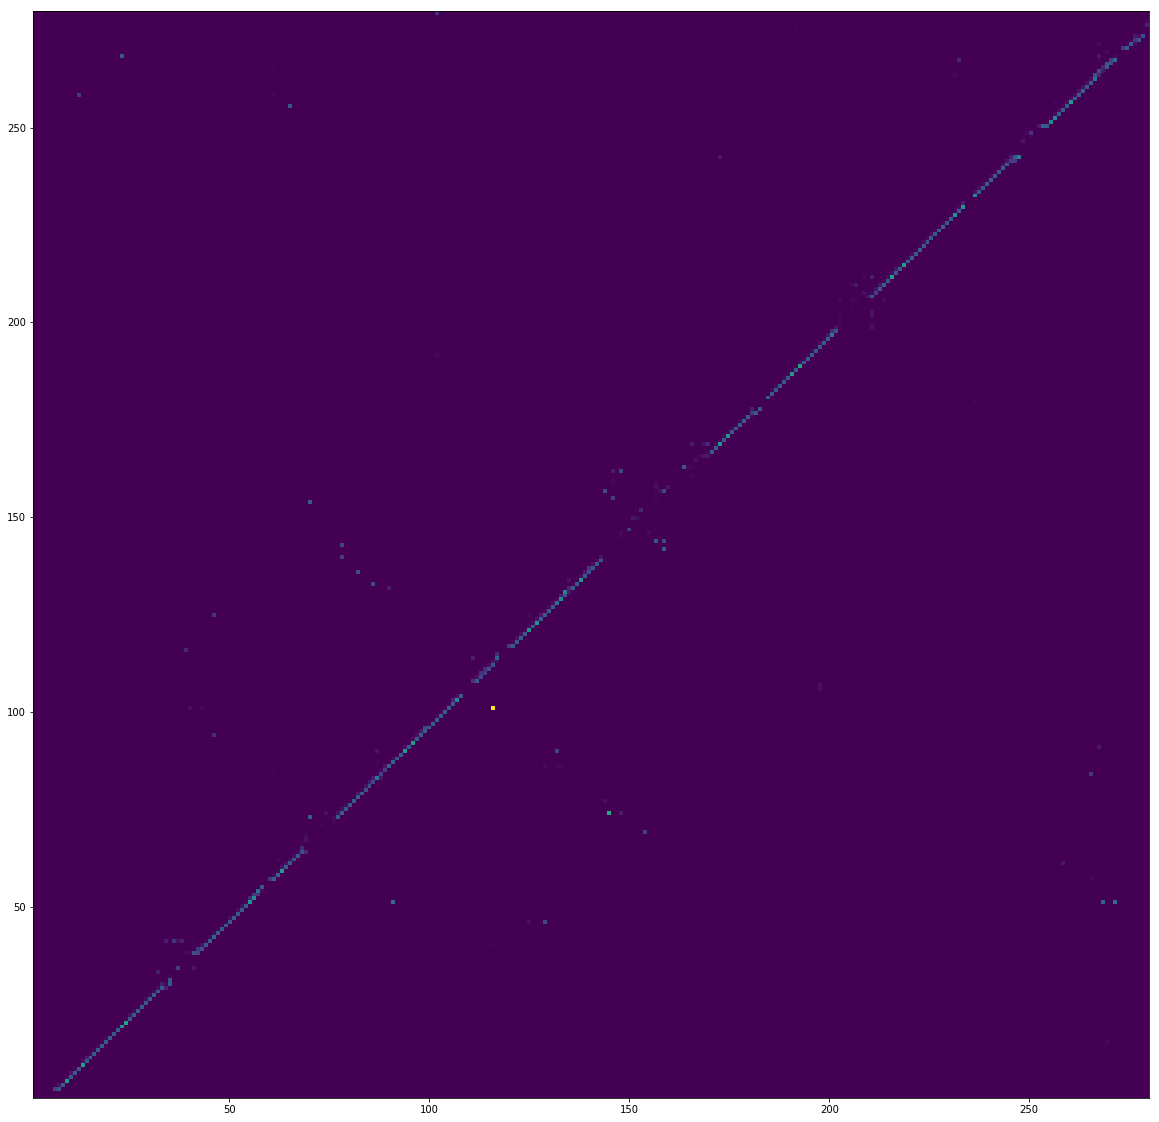

In [16]:
h_bond.heatmap(280)

In [33]:
frequency_df = h_bond.frequency()

      donor_index  acceptor_index donor_resnm  donor_resid donor_heavy_atom  \
0              87              55         ILE            7                N   
1             106              55         ILE            8                N   
2             125              69         THR            9                N   
3             131              69         THR            9              OG1   
4             139              85         ALA           10                N   
5             149             104         VAL           11                N   
6             165             123         TYR           12                N   
7             178             964         TYR           12               OH   
8             186             137         SER           13                N   
9             193             137         SER           13               OG   
10            197             147         VAL           14                N   
11            197             163         VAL       

AttributeError: 'NoneType' object has no attribute 'to_csv'

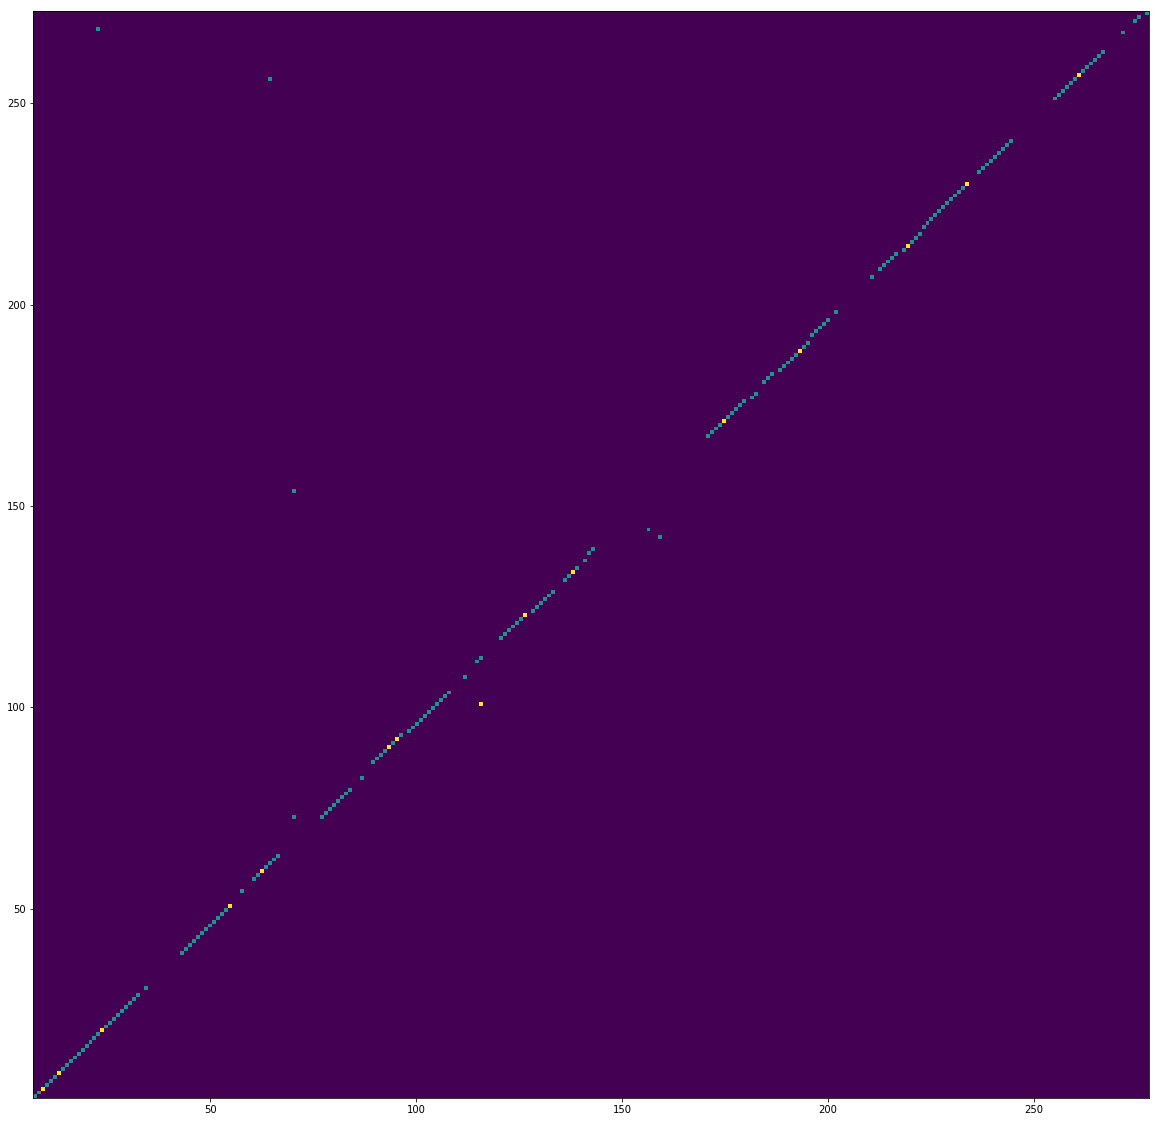

In [44]:
h_bond.inter_frequency(280, 0.9)

In [45]:
freq = h_bond.by_type_df

In [43]:
freq.to_csv(plot_folder+'frequency.csv')

In [47]:
treshhold = 0.9
inter_hbond = freq.loc[(freq['frequency'] > treshhold) & (freq['donor_resid'] != freq['acceptor_resid'])]

In [49]:
inter_hbond.to_csv(plot_folder+'inter_hbond_09_frequency.csv')